# Using RK4 to solve Ordinary Differential Equations
In this exercise, you are going to build your own ODE solver by creating a function called $myode()$. To do this, you are going to use the 4th order Runge-Kutta (RK) method.<br><br>
In the cell below, import all the necessary modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

The first step is to identify the ODE you wish to solve. Let's use the function that's in the example in the video lecture in the VLE. In the field below, translate to code the ODE<br><br>
$\frac{dy}{dx}=-2x^3+12x^2-20x+8.5$.
<br><br>Use either symbolic math or define a new Python function. If you are using symbolic math, type the equation in the cell below. Otherwise, type your Python function that accepts two arguments. The first are the individual values of the $x$ data set, and the second is the initial condition, $y=1$ at $x=0$. Use the variable $f$ for the mathematical function.

In [2]:
def f(x,y):
    dydx = -2*x**3 + 12*x**2 - 20*x + 8.5
    return dydx

You now need to select a a step size, $h$. Remember to select an appropriate step size. If it's too large, then the accuracy is sacrificed. If it's too small, then the computing efficiency is sacrificed.

In [3]:
h = 0.1

Then, you need to select a range of values for $x$. You may select the same range as in the example in the video lecture, i.e. Xx=0$ to $x=4$.

In [4]:
x = np.arange(0,4+h,h)

At this point, you will need to open a new Python script to create a function called $myode()$. This function will have two arguments as input. The first argument is the $x$ data set, while the second argument is the initial condition $y=1$ at $x=0$. In the field below, develop the code for the function $myode()$ by implementing RK4. Call your Python function to numerically solve the given ODE and assign the output to the variable $y$.

In [5]:
def myode(x,y):
    yout = np.zeros(np.size(x))
    yout[0] = y
    h = x[1] - x[0]
    for i in range(np.size(x)-1):
        k1 = f( x[i], yout[i] )
        k2 = f( x[i]+0.5*h, yout[i]+0.5*k1*h )
        k3 = f( x[i]+0.5*h, yout[i]+0.5*k2*h )
        k4 = f( x[i]+h, yout[i]+k3*h )
        yout[i+1] = yout[i] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*h
    return yout

y = myode(x,1)

Plot the numerical solution (red solid circles) against the analytical solution (black line, line width = 3). The analytical solution is easily solved, which you can do by hand. Add a title and appropriate x- and y-labels.

Text(0, 0.5, 'y')

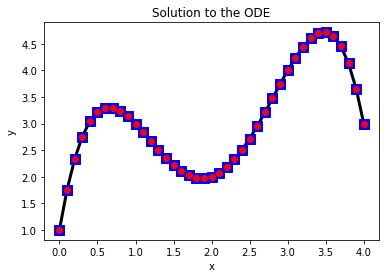

In [8]:
# Solving for the analytical solution, we get
ysol = -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

sol = integrate.solve_ivp(f,(0,4),(0,1),t_eval=np.linspace(0,4,np.size(x)))
xode, yode = sol.y
xode45 = sol.t

plt.plot(x,ysol,'k', linewidth=3)
plt.plot(xode45,yode,'bs', markerfacecolor='b', markersize=10)
plt.plot(x,y,'ro', markerfacecolor='r')
plt.title("Solution to the ODE")
plt.xlabel("x")
plt.ylabel("y")

Finally, compare your solution obtained from your function $myode()$ with the built-in Python $solve_ivp$ function from the scipy.integrate module, and add this new solution to the plot. Use blue solid squares for this solution.<br><br>
This video maybe useful: https://youtu.be/INBu1Pyj0Is.